<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2014/dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image as IMAGE
import numpy as np
from PIL import Image,ImageOps
import os
import random

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


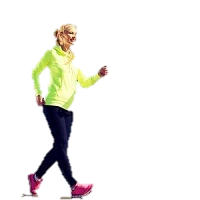

In [0]:
img = Image.open('/content/gdrive/My Drive/eva_files/rcnn/p2.png')
ImageOps.mirror(img)

In [0]:
# resize images
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-100x100')
p = '/content/gdrive/My Drive/eva_files/rcnn/fg-100x100'
imglist = os.listdir('/content/gdrive/My Drive/eva_files/rcnn/people-no bg')
for i in range(1,len(imglist)+1):
  file = '/content/gdrive/My Drive/eva_files/rcnn/people-no bg/'+str(i)+'.jpg'
  im = Image.open(file)
  im1 = im.resize((100,100))
  im1.save(os.path.join(p,'fg'+str(i)+'.png'))

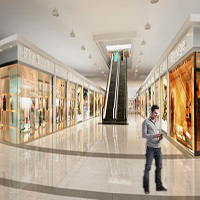

In [0]:

bg = Image.open('/content/gdrive/My Drive/eva_files/rcnn/bg-resized/2.jpg')
fg = Image.open('/content/gdrive/My Drive/eva_files/rcnn/fg-no-bg-100x100/14.png')
fg1 = ImageOps.mirror(fg)
bg.paste(fg1,(0,0),fg1)
bg

create folders to save overlay and flipped images


In [0]:
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-flip-100x100')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-flip-mask-100x100')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-bg')
os.mkdir('/content/gdrive/My Drive/eva_files/rcnn/fg-bg-mask')

overlay the images:

In [0]:
i=80001
p = '/content/gdrive/My Drive/eva_files/rcnn/'

for fg_img in range(1,21): # run for 20 foreground images

  black = np.zeros((224,224,3))
  fg = Image.open(p+'fg-no-bg-100x100/'+str(fg_img)+'.png')
  fg_mask = Image.open(p+'fg-mask-100x100/'+str(fg_img)+'.png')
  # flip the images
  fg_flip = ImageOps.mirror(fg)
  fg_mask_flip = ImageOps.mirror(fg_mask)
  # save flipped images 
  fg_flip.save(p+'fg-flip-100x100/fg-flip'+str(20+fg_img)+'.png')
  fg_mask_flip.save(p+'fg-flip-mask-100x100/fg-flip-mask'+str(20+fg_img)+'.png')

  # print('fg-flip'+str(20+fg_img)+'.png', 'fg-flip-mask'+str(20+fg_img)+'.png')

  for bg_img in range(1,101): # run for 100 background-images


    for _ in range(20):   # overlay each fg + fg-flip 20 times randomly on the bg image
      
      # choose random numbers for location where fg must be pasted on bg
      x = random.randint(0,100)
      y = random.randint(0,100)

      bg = Image.open('/content/gdrive/My Drive/Mask_Rcnn/Background/bg'+str(bg_img)+'.jpg')
        
      # overly fg on bg
      bg.paste(fg,(x,y),fg)
      bg.save(p+'fg-bg/fg-bg'+str(i)+'.png')

      
      black_img = Image.fromarray(black,mode='RGB')
      
      # overlay fg-mask on bg-mask    
      black_img.paste(fg_mask,(x,y),fg_mask)
      black_img.save(p+'fg-bg-mask/fg-bg-mask'+str(i)+'.png')

      # print(i,end=' ')
      i+=1
      x = random.randint(0,100)
      y = random.randint(0,100)

      # open bg image
      bg = Image.open('/content/gdrive/My Drive/Mask_Rcnn/Background/bg'+str(bg_img)+'.jpg')
      
      # overlay fg-flip on bg
      bg.paste(fg_flip,(x,y),fg_flip)
      bg.save(p+'fg-bg/fg-bg'+str(i)+'.png')
      
    
      # create a black img
      black_img = Image.fromarray(black,mode='RGB')
      
      # overlay fg-flip-mask on bg
      black_img.paste(fg_mask_flip,(x,y),fg_mask_flip)
      black_img.save(p+'fg-bg-mask/fg-bg-mask'+str(i)+'.png')
      # print(i,end=' ')
      i+=1
  # print(' ')

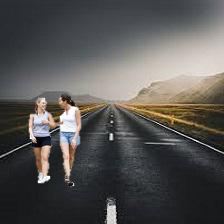

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg80001.png',width=600)

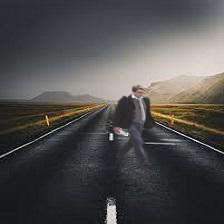

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg84001.png',width=600)

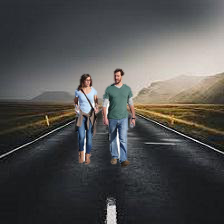

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg88001.png',width=600)

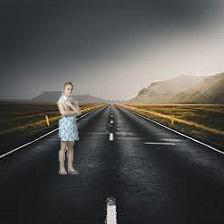

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg92001.png',width=600)

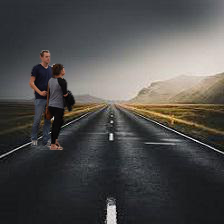

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg96001.png',width=600)

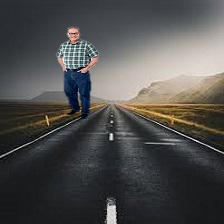

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg100001.png',width=600)

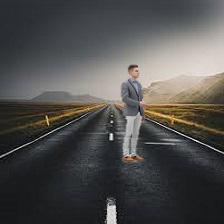

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg104001.png',width=600)

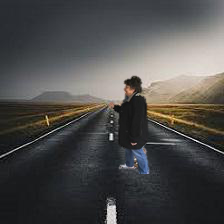

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg108001.png',width=600)

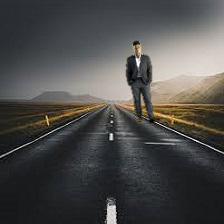

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg112001.png',width=600)

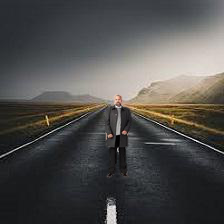

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg116001.png',width=600)

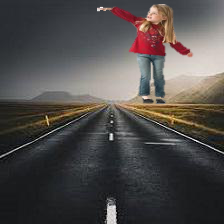

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg120001.png',width=600)

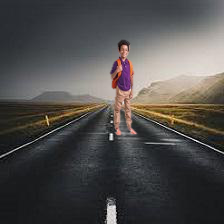

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg124001.png',width=600)

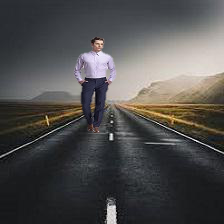

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg128001.png',width=600)

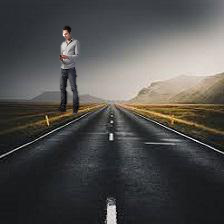

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg132001.png',width=600)

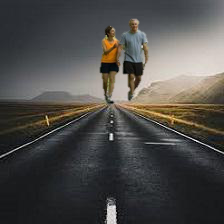

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg136001.png',width=600)

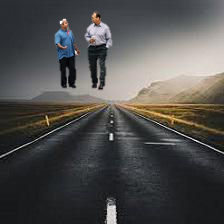

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg140001.png',width=600)

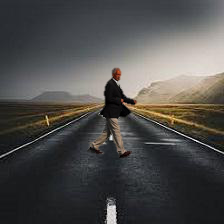

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg144001.png',width=600)

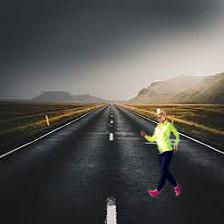

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg148001.png',width=600)

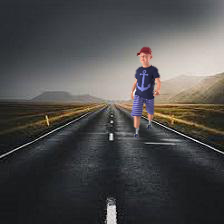

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg152001.png',width=600)

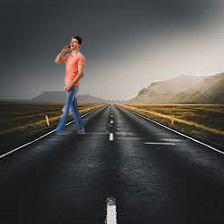

In [0]:
IMAGE('/content/gdrive/My Drive/eva_files/rcnn/fg-bg/fg-bg156001.png',width=600)